# Hypothesis Testing

The purpose of the test is to tell if there is any significant difference between two data sets.



## Overview

This module covers,

1) One sample and Two sample t-tests

2) ANOVA

3) Type I and Type II errors

4) Chi-Squared Tests

## Question 1 

*A student is trying to decide between two GPUs. He want to use the GPU for his research to run Deep learning algorithms, so the only thing he is concerned with is speed.*

*He picks a Deep Learning algorithm on a large data set and runs it on both GPUs 15 times, timing each run in hours. Results are given in the below lists GPU1 and GPU2.*

In [1]:
from scipy import stats 
import numpy as np

In [3]:
GPU1 = np.array([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9])
GPU2 = np.array([11,13,10,13,12,9,11,12,12,11,12,12,10,11,13])

#Assumption: Both the datasets (GPU1 & GPU 2) are random, independent, parametric & normally distributed

Hint: You can import ttest function from scipy to perform t tests 

**First T test**

*One sample t-test*

Check if the mean of the GPU1 is equal to zero.
- Null Hypothesis is that mean is equal to zero.
- Alternate hypothesis is that it is not equal to zero.

In [4]:
from scipy.stats import ttest_1samp
mu= 0
n=len(GPU1)
print(n)
print('Mean is %2.1f Sd is %2.1f' % (GPU1.mean(),np.std(GPU1,ddof = 1)))
t_statistic, p_value = ttest_1samp(GPU1, mu)
print(t_statistic, p_value)
print("One Sample T-test P-value", p_value)
# p-value is less than $\alpha$ = 0.05, hence we have evidence to reject the null hypothesis that mean is equal to zero

15
Mean is 10.3 Sd is 1.2
34.056241516158195 7.228892044970457e-15
One Sample T-test P-value 7.228892044970457e-15


## Question 2

Given,

Null Hypothesis : There is no significant difference between data sets

Alternate Hypothesis : There is a significant difference

*Do two-sample testing and check whether to reject Null Hypothesis or not.*

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

2.627629513471839 0.013794282041452725
two-sample t-test p-value= 0.013794282041452725
p-value is less than the alpha value of 0.05 and is in the significant region
We have the evidence to reject the null hypothesis, the datasets are significantly different


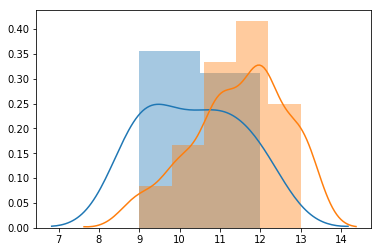

In [27]:
import seaborn as sns
from scipy.stats import ttest_ind
sns.distplot(GPU1)
sns.distplot(GPU2)
t_statistic, p_value = ttest_ind(GPU2, GPU1)
print(t_statistic, p_value)
print ("two-sample t-test p-value=", p_value)
print('p-value is less than the alpha value of 0.05 and is in the significant region')
print('We have the evidence to reject the null hypothesis, the datasets are significantly different')

## Question 3

He is trying a third GPU - GPU3.

In [6]:
GPU3 = np.array([9,10,9,11,10,13,12,9,12,12,13,12,13,10,11])

#Assumption: Both the datasets (GPU1 & GPU 3) are random, independent, parametric & normally distributed

*Do two-sample testing and check whether there is significant differene between speeds of two GPUs GPU1 and GPU3.*

#### Answer:

In testing whether speeds of the GPU, the null hypothesis states that there is no difference in speeds of the GPU1 and GPU3, $\mu{speeed of GPU3}$ equals $\mu{Speed of GPU1}$. The alternative hypthesis states that there is significant difference in speeds of the two GPUs i,e, GPU1 and GPU3, $\mu{speed of GPU3}$ $\neq$ $\mu{speed of GPU1}$

* $H_0$: There is no significant difference in speeds of GPU1 and GPU3
* $H_A$: There is significant difference in speeds of GPU1 and GPU3

1.4988943759093303 0.14509210993138993
two-sample t-test p-value= 0.14509210993138993
p-value is greater than the alpha value of 0.05 and is not in the critical region
We do not have evidence to reject the null, there is no significant difference in speeds of GPU1 and GPU3


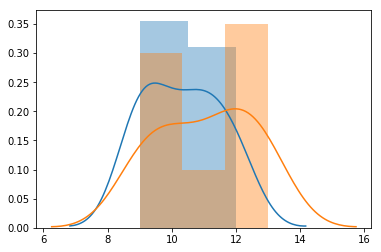

In [9]:
import seaborn as sns
from scipy.stats import ttest_ind
sns.distplot(GPU1)
sns.distplot(GPU3)
t_statistic, p_value = ttest_ind(GPU3, GPU1)
print(t_statistic,p_value)
print ("two-sample t-test p-value=", p_value)
print('p-value is greater than the alpha value of 0.05 and is not in the critical region')
print('We do not have evidence to reject the null, there is no significant difference in speeds of GPU1 and GPU3')

## ANOVA

## Question 4 

If you need to compare more than two data sets at a time, an ANOVA is your best bet. 

*The results from three experiments with overlapping 95% confidence intervals are given below, and we want to confirm that the results for all three experiments are not significantly different.*

But before conducting ANOVA, test equality of variances (using Levene's test) is satisfied or not. If not, then mention that we cannot depend on the result of ANOVA

In [11]:
import numpy as np

e1 = np.array([1.595440,1.419730,0.000000,0.000000])
e2 = np.array([1.433800,2.079700,0.892139,2.384740])
e3 = np.array([0.036930,0.938018,0.995956,1.006970])

#Assumption: All the 3 datasets (e1,e2 & e3) are random, independent, parametric & normally distributed

Perform levene test on the data

The Levene test tests the null hypothesis that all input samples are from populations with equal variances. Levene’s test is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality.

source: scipy.org

#### Answer:

In [12]:
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
print('Mean, Variance and standard deviation of Experiment 1: %3d, %3.2f and %3.2f' % (e1.mean(),e1.var(), np.std(e1,ddof =1)))
print('Mean, Variance and standard deviation of Experiment 2: %3d, %3.2f and %3.2f' % (e2.mean(),e2.var(), np.std(e2,ddof =1)))
print('Mean, variance and standard deviation of Experiment 3: %3d, %3.2f and %3.2f' % (e3.mean(),e3.var(), np.std(e3,ddof =1)))

Mean, Variance and standard deviation of Experiment 1:   0, 0.57 and 0.87
Mean, Variance and standard deviation of Experiment 2:   1, 0.33 and 0.67
Mean, variance and standard deviation of Experiment 3:   0, 0.17 and 0.47


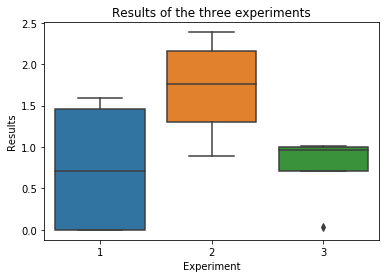

In [13]:
Exps = pd.DataFrame()

exp1= pd.DataFrame({'Experiment': '1', 'Results':e1})
exp2= pd.DataFrame({'Experiment': '2', 'Results':e2})
exp3= pd.DataFrame({'Experiment': '3', 'Results':e3})

Exps = Exps.append(exp1) 
Exps = Exps.append(exp2) 
Exps = Exps.append(exp3)

sns.boxplot(x = "Experiment", y = "Results", data = Exps)
plt.title('Results of the three experiments')
plt.show()

In [15]:
f_statistic, p_value = stats.levene(e1,e2,e3)
# null Hypothesis : The inputs samples are from population with equal variances
print('p-value is greater than the significance level of 0.05, hence we fail to reject null', p_value)

p-value is greater than the significance level of 0.05, hence we fail to reject null 0.12259792666001798


## Question 5

The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

use stats.f_oneway() module to perform one-way ANOVA test

# State the null and alternative hypothesis:
* $H_0$: $\mu1$ = $\mu2$ = $\mu3$ (All 3 experiements have the same population mean)
* $H_A$: At least one $\mu$ differs 

In [16]:
f_statistic, p_value = stats.f_oneway(e1,e2,e3)
print('pvalue is greater than the significant level of 0.05', p_value)
print('We dont have evidence to reject null, all three sample experiments have the same population mean')

pvalue is greater than the significant level of 0.05 0.13574644501798466
We dont have evidence to reject null, all three sample experiments have the same population mean


## Question 6

*In one or two sentences explain about **TypeI** and **TypeII** errors.*

#### Answer:

#### All the statistical conclusions are made with reference to the null hypothesis; we either Reject null or fail to reject null
#### Type-I Error happens when we actually reject the null hypothesis, when it is true and is denoted as $\alpha$ ( the confidence level is usually at 95%)
#### Type-II Error happens when we actually fail to reject the null hypothesis; when it is false and is denoted as  $\beta$ (the maximizing the power for fixed alpha =0.05)

## Question 7 

You are a manager of a chinese restaurant. You want to determine whether the waiting time to place an order has changed in the past month from its previous population mean value of 4.5 minutes. 
State the null and alternative hypothesis.

#### Answer:


# State the null and alternative hypothesis:
* $H_0$: $\mu$ = 4.5 (waiting time to place an order has not changed)
* $H_A$: $\mu$ $\neq$ 4.5 (waiting time to place an order has changed)

## Chi square test

## Question 8

Let's create a small dataset for dice rolls of four players

In [20]:
import numpy as np

d1 = [5, 8, 3, 8]
d2 = [9, 6, 8, 5]
d3 = [8, 12, 7, 2]
d4 = [4, 16, 7, 3]
d5 = [3, 9, 6, 5]
d6 = [7, 2, 5, 7]

dice = np.array([d1, d2, d3, d4, d5, d6])

run the test using SciPy Stats library

Depending on the test, we are generally looking for a threshold at either 0.05 or 0.01. Our test is significant (i.e. we reject the null hypothesis) if we get a p-value below our threshold.

For our purposes, we’ll use 0.01 as the threshold.

use stats.chi2_contingency() module 

This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table

Print the following:

- chi2 stat
- p-value
- degree of freedom
- contingency



In [21]:
import pandas      as pd
import numpy       as np
import scipy.stats as stats

chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(dice)

print("===Chi2 Stat===")
print(chi_sq_Stat)
print("\n")
print("===Degrees of Freedom===")
print(deg_freedom)
print("\n")
print("===P-Value===")
print(p_value)
print("\n")
print("===Contingency Table===")
print(exp_freq)

print("The p-value is greater than the level of significance of 0.05 and 0.01 and hence we fail to reject the null")

===Chi2 Stat===
23.315671914716496


===Degrees of Freedom===
15


===P-Value===
0.07766367301496693


===Contingency Table===
[[ 5.57419355  8.20645161  5.57419355  4.64516129]
 [ 6.50322581  9.57419355  6.50322581  5.41935484]
 [ 6.73548387  9.91612903  6.73548387  5.61290323]
 [ 6.96774194 10.25806452  6.96774194  5.80645161]
 [ 5.34193548  7.86451613  5.34193548  4.4516129 ]
 [ 4.87741935  7.18064516  4.87741935  4.06451613]]
The p-value is greater than the level of significance of 0.05 and 0.01 and hence we fail to reject the null


## Question 9

### Z-test

Get zscore on the above dice data using stats.zscore module from scipy. Convert zscore values to p-value and take mean of the array.

In [22]:
z_scores = stats.zscore(dice)
print(z_scores)
p_values = stats.norm.sf(abs(z_scores))
print(p_values)
print(p_values.mean())

[[-0.46291005 -0.18884739 -1.83711731  1.44115338]
 [ 1.38873015 -0.64208114  1.22474487  0.        ]
 [ 0.9258201   0.7176201   0.61237244 -1.44115338]
 [-0.9258201   1.62408759  0.61237244 -0.96076892]
 [-1.38873015  0.03776948  0.          0.        ]
 [ 0.46291005 -1.54854863 -0.61237244  0.96076892]]
[[0.32171442 0.42510621 0.03309629 0.07477068]
 [0.08245741 0.26041025 0.11033568 0.5       ]
 [0.17726974 0.23649578 0.27014569 0.07477068]
 [0.17726974 0.05217856 0.27014569 0.16833418]
 [0.08245741 0.48493574 0.5        0.5       ]
 [0.32171442 0.06074513 0.27014569 0.16833418]]
0.23428473233691496


## Question 10

A Paired sample t-test compares means from the same group at different times.

The basic two sample t-test is designed for testing differences between independent groups. 
In some cases, you might be interested in testing differences between samples of the same group at different points in time. 
We can conduct a paired t-test using the scipy function stats.ttest_rel(). 

In [24]:
before= stats.norm.rvs(scale=30, loc=100, size=500) ## Creates a normal distribution with a mean value of 100 and std of 30
after = before + stats.norm.rvs(scale=5, loc=-1.25, size=500)

Test whether a weight-loss drug works by checking the weights of the same group patients before and after treatment using above data.

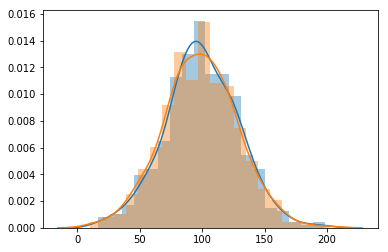

In [25]:
import seaborn as sns
sns.distplot(before)
sns.distplot(after)

In [26]:
t_statistic, p_value = stats.ttest_rel(before,after)
print("p value for paired t-test", p_value)
print('p-value is less than the 0.05 level of significance ')
print('Hence we have evidence to reject null that there is no significant different in weight loss for patients before and after treatment')

p value for paired t-test 1.789019907796009e-07
p-value is less than the 0.05 level of significance 
Hence we have evidence to reject null that there is no significant different in weight loss for patients before and after treatment
